<a href="https://www.kaggle.com/code/zakariahaci/notebook48b08ddc47?scriptVersionId=130428002" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#dt wrangling

import numpy as np
import pandas as pd
import missingno
from collections import Counter
from collections import OrderedDict
#dt vis

import matplotlib.pyplot as plt
import seaborn as sns
#functio
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
#modele
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
#tab
from tabulate import tabulate
# Model Validat

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Remove unnecessary warnings

import warnings
warnings.filterwarnings('ignore')


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
DATAZH=pd.read_csv('/kaggle/input/datahaci/train-3.csv')

In [3]:
DATAZH

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


In [4]:
DATAZH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

<AxesSubplot: >

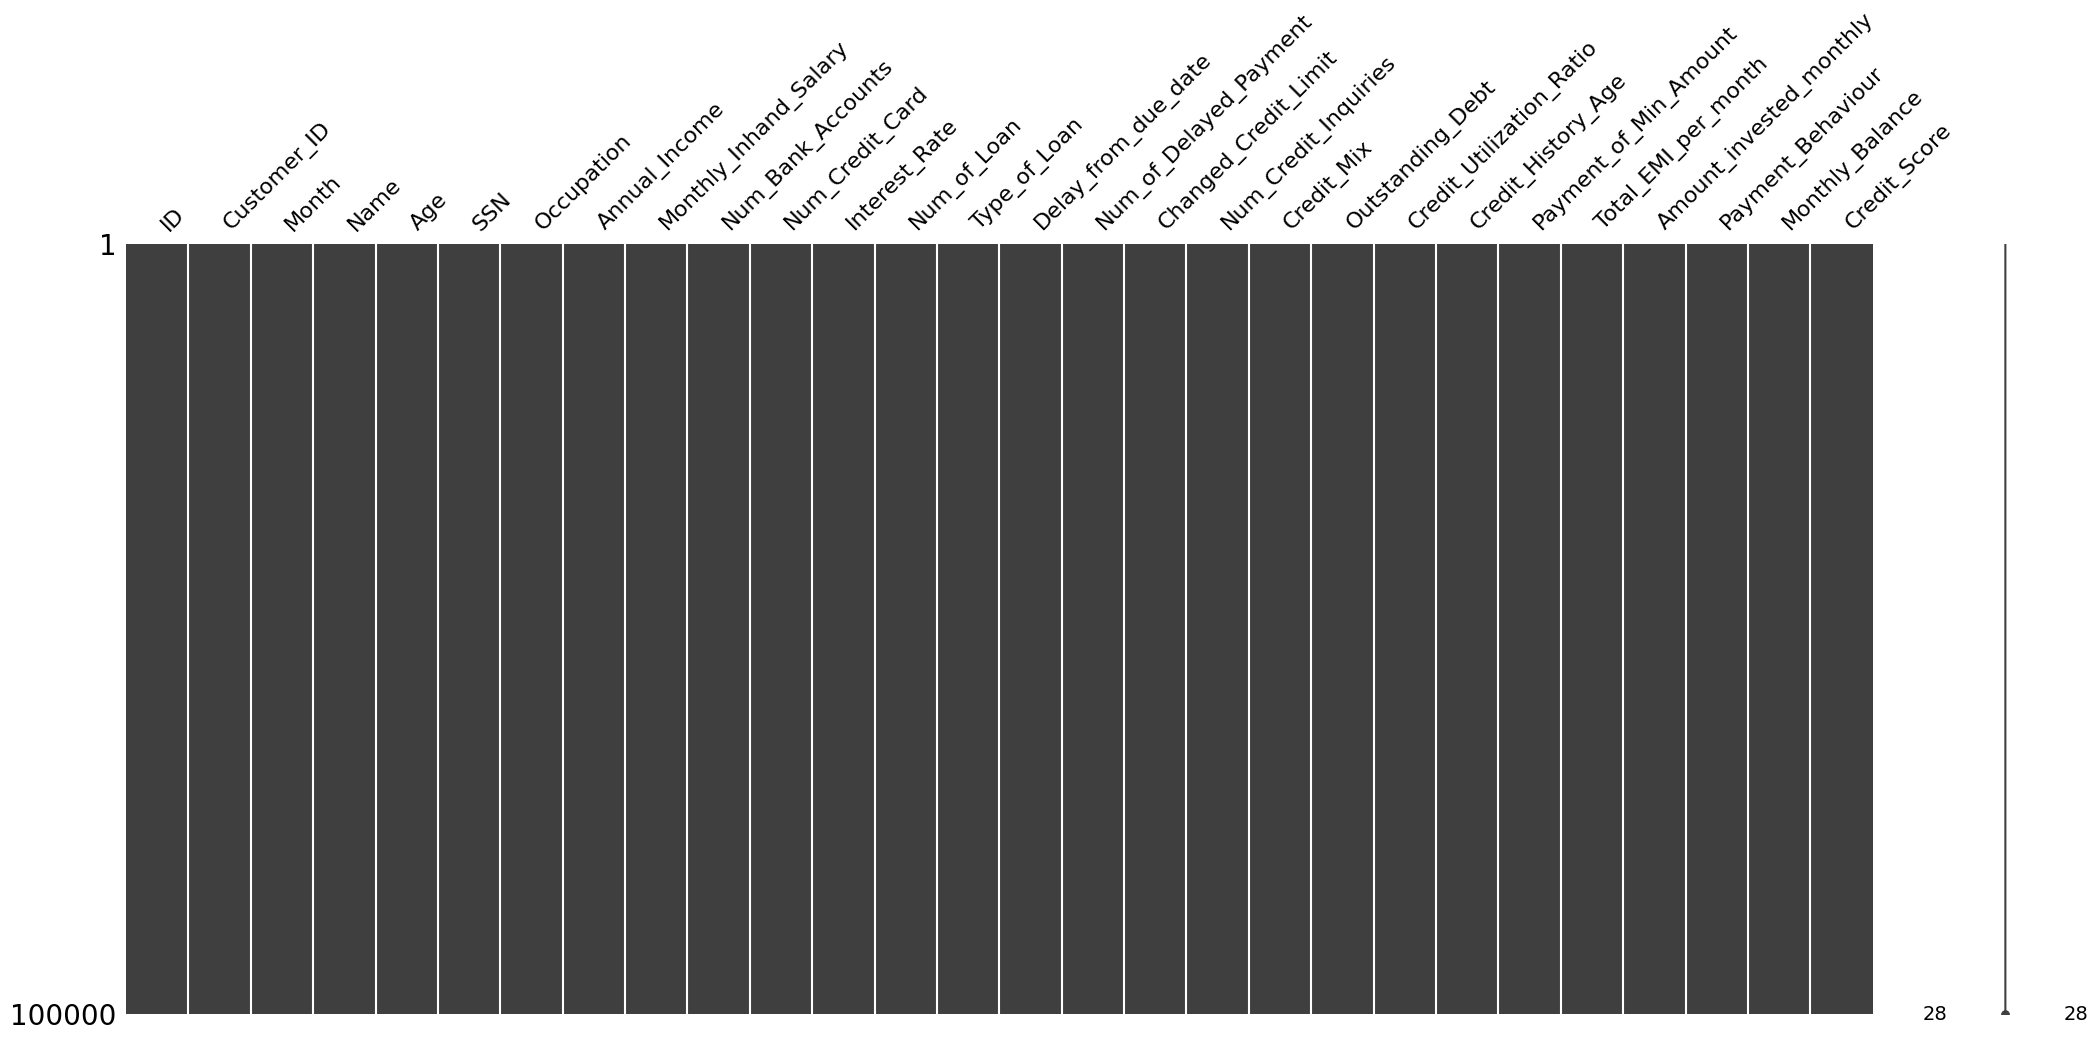

In [5]:
missingno.matrix(DATAZH)



In [6]:
DATAZH.isnull().T

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
ID,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Customer_ID,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Month,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Name,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Age,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
SSN,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Occupation,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Annual_Income,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Monthly_Inhand_Salary,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Num_Bank_Accounts,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
DATAZH.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,100000.0,8.063150e+04,4.330149e+04,5634.000000,4.313275e+04,8.063150e+04,1.181302e+05,1.556290e+05
Customer_ID,100000.0,2.598267e+04,1.434054e+04,1006.000000,1.366450e+04,2.577700e+04,3.838500e+04,5.099900e+04
Month,100000.0,4.500000e+00,2.291299e+00,1.000000,2.750000e+00,4.500000e+00,6.250000e+00,8.000000e+00
Age,100000.0,3.331634e+01,1.076481e+01,14.000000,2.400000e+01,3.300000e+01,4.200000e+01,5.600000e+01
SSN,100000.0,5.004617e+08,2.908267e+08,81349.000000,2.451686e+08,5.006886e+08,7.560027e+08,9.999934e+08
Annual_Income,100000.0,5.050512e+04,3.829942e+04,7005.930000,1.934297e+04,3.699971e+04,7.168347e+04,1.799873e+05
Monthly_Inhand_Salary,100000.0,4.197271e+03,3.186432e+03,303.645417,1.626594e+03,3.095905e+03,5.957715e+03,1.520463e+04
Num_Bank_Accounts,100000.0,5.368820e+00,2.593314e+00,0.000000,3.000000e+00,5.000000e+00,7.000000e+00,1.100000e+01
Num_Credit_Card,100000.0,5.533570e+00,2.067098e+00,0.000000,4.000000e+00,5.000000e+00,7.000000e+00,1.100000e+01
Interest_Rate,100000.0,1.453208e+01,8.741330e+00,1.000000,7.000000e+00,1.300000e+01,2.000000e+01,3.400000e+01


In [8]:
occupation_count = DATAZH['Occupation'].value_counts(dropna = False)
occupation_count

Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: Occupation, dtype: int64

Text(0.5, 0, 'Occupation')

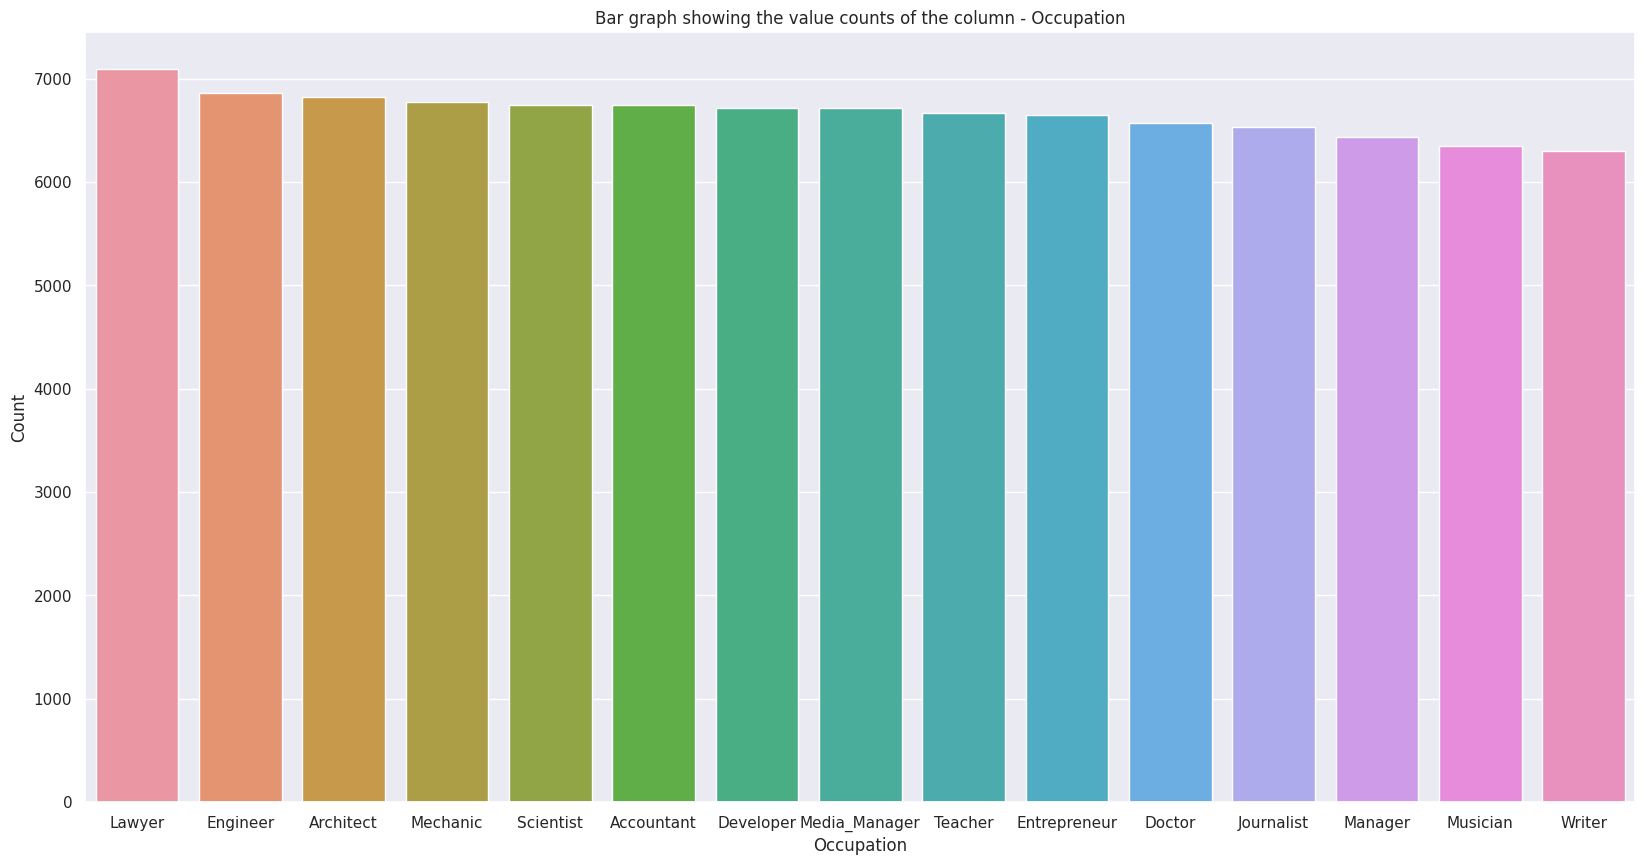

In [9]:
sns.set(rc={'figure.figsize': (20, 10)})
sns.barplot(x=occupation_count.index, y=occupation_count.values)
plt.title('Bar graph showing the value counts of the column - Occupation')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Occupation', fontsize=12)


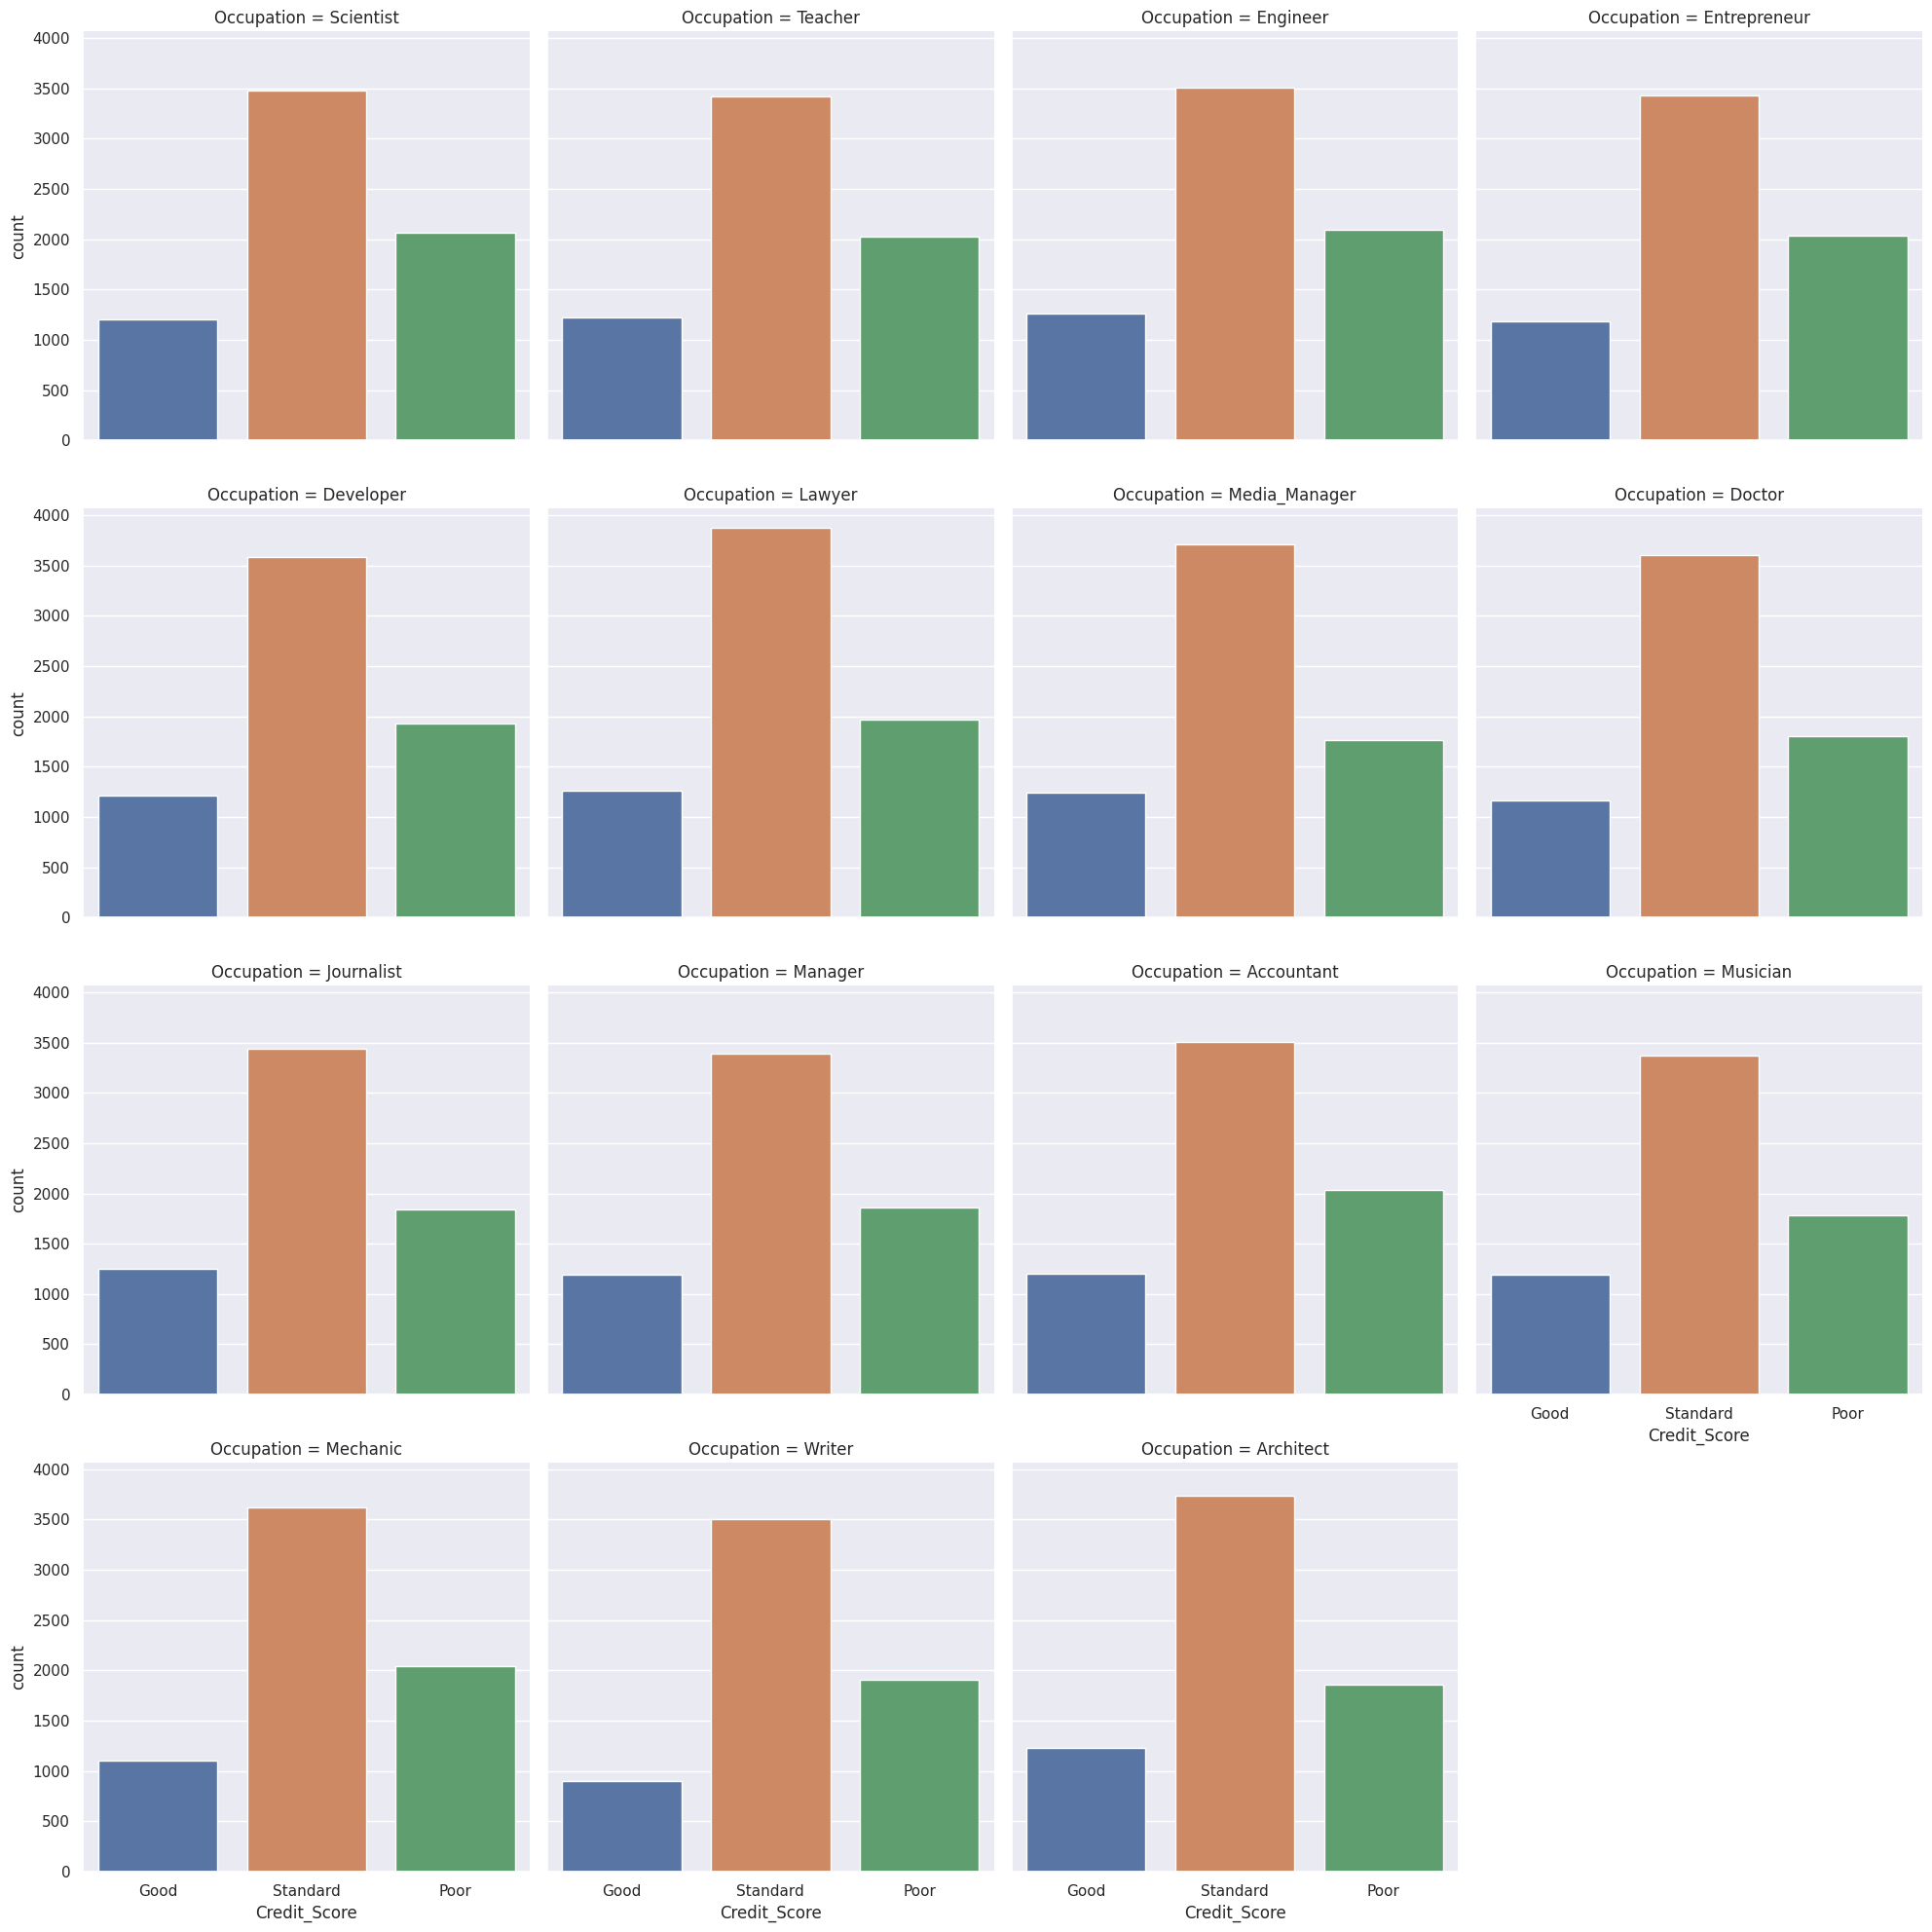

In [10]:
sns.catplot(x='Credit_Score', col='Occupation', data=DATAZH, kind='count', col_wrap=4)


In [11]:
index_values = ~DATAZH['Type_of_Loan'].isnull().values
loan_type_data = list(DATAZH['Type_of_Loan'][index_values])
loan_type_data

['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan,

In [12]:
loan_type_dict = dict()
for value in loan_type_data:
    values = value.split(',')
    for each_value in values:
        loan_type = each_value.strip(' ')
        if 'and' in loan_type:
            loan_type = loan_type[4 : ]
        if loan_type in loan_type_dict:
            loan_type_dict[loan_type] += 1
        else:
            loan_type_dict[loan_type] = 1

loan_type_dict

{'Auto Loan': 37992,
 'Credit-Builder Loan': 40440,
 'Personal Loan': 38888,
 'Home Equity Loan': 39104,
 'Not Specified': 39616,
 'No Data': 11408,
 'Mortgage Loan': 38936,
 'Student Loan': 38968,
 'Debt Consolidation Loan': 38776,
 'Payday Loan': 40568}

Text(0.5, 0, 'Type_of_Loan')

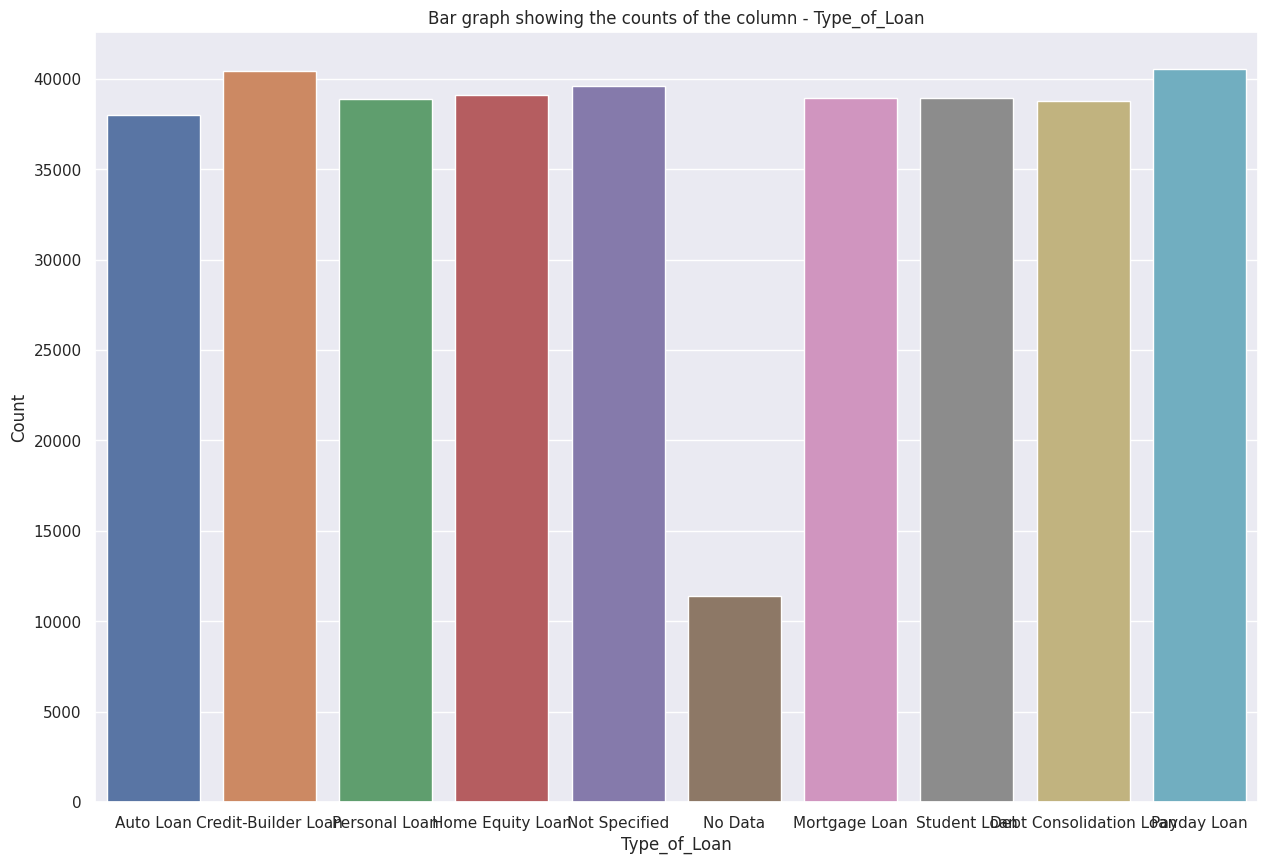

In [13]:
loan_type_df = pd.DataFrame({'Type_of_Loan': list(loan_type_dict.keys()), 'Count': list(loan_type_dict.values())})
sns.set(rc={'figure.figsize': (15, 10)})
sns.barplot(x='Type_of_Loan', y='Count', data=loan_type_df)
plt.title('Bar graph showing the counts of the column - Type_of_Loan')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Type_of_Loan', fontsize=12)


In [14]:
DATAZH.Credit_Mix.tail(10)

99990     Bad
99991     Bad
99992    Good
99993    Good
99994    Good
99995    Good
99996    Good
99997    Good
99998    Good
99999    Good
Name: Credit_Mix, dtype: object

In [15]:
credit_mix_count = DATAZH['Credit_Mix'].value_counts(dropna = False)
credit_mix_count

Standard    45848
Good        30384
Bad         23768
Name: Credit_Mix, dtype: int64

In [16]:
Payment_of_Min_Amount = DATAZH['Payment_of_Min_Amount'].value_counts(dropna = False)
Payment_of_Min_Amount

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

In [17]:
Payment_Behaviour = DATAZH['Payment_Behaviour'].value_counts(dropna = False)
Payment_Behaviour

Low_spent_Small_value_payments      28616
High_spent_Medium_value_payments    19738
High_spent_Large_value_payments     14726
Low_spent_Medium_value_payments     14399
High_spent_Small_value_payments     11764
Low_spent_Large_value_payments      10757
Name: Payment_Behaviour, dtype: int64

In [18]:
Type_of_Loan = DATAZH['Type_of_Loan'].value_counts(dropna = False)
Type_of_Loan

No Data                                                                                                                               11408
Not Specified                                                                                                                          1408
Credit-Builder Loan                                                                                                                    1280
Personal Loan                                                                                                                          1272
Debt Consolidation Loan                                                                                                                1264
                                                                                                                                      ...  
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                  8
Payday Loan, Mortgag

In [19]:
Credit_Score = DATAZH['Credit_Score'].value_counts(dropna = False)
Credit_Score

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [20]:
DATAZH.T

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
ID,5634,5635,5636,5637,5638,5639,5640,5641,5646,5647,...,155616,155617,155622,155623,155624,155625,155626,155627,155628,155629
Customer_ID,3392,3392,3392,3392,3392,3392,3392,3392,8625,8625,...,34304,34304,37932,37932,37932,37932,37932,37932,37932,37932
Month,1,2,3,4,5,6,7,8,1,2,...,7,8,1,2,3,4,5,6,7,8
Name,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Rick Rothackerj,Rick Rothackerj,...,Sarah McBridec,Sarah McBridec,Nicks,Nicks,Nicks,Nicks,Nicks,Nicks,Nicks,Nicks
Age,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,28.0,28.0,...,28.0,29.0,24.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0
SSN,821000265.0,821000265.0,821000265.0,821000265.0,821000265.0,821000265.0,821000265.0,821000265.0,4075839.0,4075839.0,...,31350942.0,31350942.0,78735990.0,78735990.0,78735990.0,78735990.0,78735990.0,78735990.0,78735990.0,78735990.0
Occupation,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist,Teacher,Teacher,...,Architect,Architect,Mechanic,Mechanic,Mechanic,Mechanic,Mechanic,Mechanic,Mechanic,Mechanic
Annual_Income,19114.12,19114.12,19114.12,19114.12,19114.12,19114.12,19114.12,19114.12,34847.84,34847.84,...,20002.88,20002.88,39628.99,39628.99,39628.99,39628.99,39628.99,39628.99,39628.99,39628.99
Monthly_Inhand_Salary,1824.843333,1824.843333,1824.843333,1824.843333,1824.843333,1824.843333,1824.843333,1824.843333,3037.986667,3037.986667,...,1929.906667,1929.906667,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833
Num_Bank_Accounts,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,...,10.0,10.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


In [21]:
credit_mix_count = DATAZH['Credit_Score'].value_counts(dropna = False)
credit_mix_count

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [22]:
encoder = OneHotEncoder()

encoded_data = encoder.fit_transform(DATAZH[['Occupation']]).toarray()
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Occupation']))

encoded_df

,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [23]:
DATAZH.head(40)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
5,5639,3392,6,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,27.262259,270.0,No,49.574949,21.465380,High_spent_Medium_value_payments,340.479212,Good
6,5640,3392,7,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,22.537593,271.0,No,49.574949,21.465380,Low_spent_Small_value_payments,244.565317,Good
7,5641,3392,8,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,23.933795,272.0,No,49.574949,21.465380,High_spent_Medium_value_payments,358.124168,Standard
8,5646,8625,1,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,...,Good,605.03,24.464031,319.0,No,18.816215,39.684018,Low_spent_Small_value_payments,470.690627,Standard
9,5647,8625,2,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,...,Good,605.03,38.550848,320.0,No,18.816215,39.684018,High_spent_Large_value_payments,484.591214,Good


In [24]:
data_encoded = pd.concat([DATAZH, encoded_df], axis=1)


In [25]:
data_encoded.T

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
ID,5634,5635,5636,5637,5638,5639,5640,5641,5646,5647,...,155616,155617,155622,155623,155624,155625,155626,155627,155628,155629
Customer_ID,3392,3392,3392,3392,3392,3392,3392,3392,8625,8625,...,34304,34304,37932,37932,37932,37932,37932,37932,37932,37932
Month,1,2,3,4,5,6,7,8,1,2,...,7,8,1,2,3,4,5,6,7,8
Name,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Rick Rothackerj,Rick Rothackerj,...,Sarah McBridec,Sarah McBridec,Nicks,Nicks,Nicks,Nicks,Nicks,Nicks,Nicks,Nicks
Age,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,28.0,28.0,...,28.0,29.0,24.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0
SSN,821000265.0,821000265.0,821000265.0,821000265.0,821000265.0,821000265.0,821000265.0,821000265.0,4075839.0,4075839.0,...,31350942.0,31350942.0,78735990.0,78735990.0,78735990.0,78735990.0,78735990.0,78735990.0,78735990.0,78735990.0
Occupation,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist,Teacher,Teacher,...,Architect,Architect,Mechanic,Mechanic,Mechanic,Mechanic,Mechanic,Mechanic,Mechanic,Mechanic
Annual_Income,19114.12,19114.12,19114.12,19114.12,19114.12,19114.12,19114.12,19114.12,34847.84,34847.84,...,20002.88,20002.88,39628.99,39628.99,39628.99,39628.99,39628.99,39628.99,39628.99,39628.99
Monthly_Inhand_Salary,1824.843333,1824.843333,1824.843333,1824.843333,1824.843333,1824.843333,1824.843333,1824.843333,3037.986667,3037.986667,...,1929.906667,1929.906667,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833
Num_Bank_Accounts,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,...,10.0,10.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


In [26]:

encoded_data = encoder.fit_transform(data_encoded[['Type_of_Loan']]).toarray()
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Type_of_Loan']))

encoded_df

,Type_of_Loan_Auto Loan,"Type_of_Loan_Auto Loan, Auto Loan, Auto Loan, Auto Loan, Credit-Builder Loan, Credit-Builder Loan, Mortgage Loan, and Personal Loan","Type_of_Loan_Auto Loan, Auto Loan, Auto Loan, Auto Loan, Student Loan, and Student Loan","Type_of_Loan_Auto Loan, Auto Loan, Auto Loan, Credit-Builder Loan, Payday Loan, Not Specified, Payday Loan, Student Loan, and Debt Consolidation Loan","Type_of_Loan_Auto Loan, Auto Loan, Auto Loan, Not Specified, Debt Consolidation Loan, and Credit-Builder Loan","Type_of_Loan_Auto Loan, Auto Loan, Auto Loan, Not Specified, and Home Equity Loan","Type_of_Loan_Auto Loan, Auto Loan, Auto Loan, Personal Loan, Student Loan, and Not Specified","Type_of_Loan_Auto Loan, Auto Loan, Auto Loan, and Debt Consolidation Loan","Type_of_Loan_Auto Loan, Auto Loan, Auto Loan, and Home Equity Loan","Type_of_Loan_Auto Loan, Auto Loan, Auto Loan, and Not Specified",...,"Type_of_Loan_Student Loan, Student Loan, and Student Loan","Type_of_Loan_Student Loan, and Auto Loan","Type_of_Loan_Student Loan, and Credit-Builder Loan","Type_of_Loan_Student Loan, and Debt Consolidation Loan","Type_of_Loan_Student Loan, and Home Equity Loan","Type_of_Loan_Student Loan, and Mortgage Loan","Type_of_Loan_Student Loan, and Not Specified","Type_of_Loan_Student Loan, and Payday Loan","Type_of_Loan_Student Loan, and Personal Loan","Type_of_Loan_Student Loan, and Student Loan"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
data_encoded.T

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
ID,5634,5635,5636,5637,5638,5639,5640,5641,5646,5647,...,155616,155617,155622,155623,155624,155625,155626,155627,155628,155629
Customer_ID,3392,3392,3392,3392,3392,3392,3392,3392,8625,8625,...,34304,34304,37932,37932,37932,37932,37932,37932,37932,37932
Month,1,2,3,4,5,6,7,8,1,2,...,7,8,1,2,3,4,5,6,7,8
Name,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Rick Rothackerj,Rick Rothackerj,...,Sarah McBridec,Sarah McBridec,Nicks,Nicks,Nicks,Nicks,Nicks,Nicks,Nicks,Nicks
Age,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,28.0,28.0,...,28.0,29.0,24.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0
SSN,821000265.0,821000265.0,821000265.0,821000265.0,821000265.0,821000265.0,821000265.0,821000265.0,4075839.0,4075839.0,...,31350942.0,31350942.0,78735990.0,78735990.0,78735990.0,78735990.0,78735990.0,78735990.0,78735990.0,78735990.0
Occupation,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist,Teacher,Teacher,...,Architect,Architect,Mechanic,Mechanic,Mechanic,Mechanic,Mechanic,Mechanic,Mechanic,Mechanic
Annual_Income,19114.12,19114.12,19114.12,19114.12,19114.12,19114.12,19114.12,19114.12,34847.84,34847.84,...,20002.88,20002.88,39628.99,39628.99,39628.99,39628.99,39628.99,39628.99,39628.99,39628.99
Monthly_Inhand_Salary,1824.843333,1824.843333,1824.843333,1824.843333,1824.843333,1824.843333,1824.843333,1824.843333,3037.986667,3037.986667,...,1929.906667,1929.906667,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833
Num_Bank_Accounts,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,...,10.0,10.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


In [28]:

# Assuming your DataFrame is named 'data' and the loan type column is named 'LoanType'
loan_type_dict = {'Personal Loan': 0, 'Home Equity Loan': 0, 'Auto Loan': 0, 'Mortgage Loan': 0, 'Credit-Builder Loan': 0, 'Student Loan': 0, 'Debt Consolidation Loan': 0, 'Payday Loan': 0, 'No Data' : 0 , 'Not Specified' : 0}

# Create separate columns for each loan type
for Type_of_Loan in loan_type_dict.keys():
    if Type_of_Loan != 'Not Specified':
        data_encoded[Type_of_Loan] = data_encoded['Type_of_Loan'].apply(lambda x: 1 if x == Type_of_Loan else 0)



In [29]:
data_encoded.T

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
ID,5634,5635,5636,5637,5638,5639,5640,5641,5646,5647,...,155616,155617,155622,155623,155624,155625,155626,155627,155628,155629
Customer_ID,3392,3392,3392,3392,3392,3392,3392,3392,8625,8625,...,34304,34304,37932,37932,37932,37932,37932,37932,37932,37932
Month,1,2,3,4,5,6,7,8,1,2,...,7,8,1,2,3,4,5,6,7,8
Name,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Rick Rothackerj,Rick Rothackerj,...,Sarah McBridec,Sarah McBridec,Nicks,Nicks,Nicks,Nicks,Nicks,Nicks,Nicks,Nicks
Age,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,28.0,28.0,...,28.0,29.0,24.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0
SSN,821000265.0,821000265.0,821000265.0,821000265.0,821000265.0,821000265.0,821000265.0,821000265.0,4075839.0,4075839.0,...,31350942.0,31350942.0,78735990.0,78735990.0,78735990.0,78735990.0,78735990.0,78735990.0,78735990.0,78735990.0
Occupation,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist,Teacher,Teacher,...,Architect,Architect,Mechanic,Mechanic,Mechanic,Mechanic,Mechanic,Mechanic,Mechanic,Mechanic
Annual_Income,19114.12,19114.12,19114.12,19114.12,19114.12,19114.12,19114.12,19114.12,34847.84,34847.84,...,20002.88,20002.88,39628.99,39628.99,39628.99,39628.99,39628.99,39628.99,39628.99,39628.99
Monthly_Inhand_Salary,1824.843333,1824.843333,1824.843333,1824.843333,1824.843333,1824.843333,1824.843333,1824.843333,3037.986667,3037.986667,...,1929.906667,1929.906667,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833
Num_Bank_Accounts,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,...,10.0,10.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


In [30]:
data_encoded = data_encoded.rename(columns={'Auto Loan':'auto_loan','Credit-Builder Loan':'credit_builder_loan','Personal Loan':'personal_loan','Home Equity Loan':'home_equity_loan','Mortgage Loan':'mortgage_loan','Student Loan':'student_loan','Debt Consolidation Loan':'debt_consolidation_loan','Payday Loan':'payday_loan','Not Specified':'Not_Specified','No Data':'No_Data'})

In [31]:
data_encoded.T

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
ID,5634,5635,5636,5637,5638,5639,5640,5641,5646,5647,...,155616,155617,155622,155623,155624,155625,155626,155627,155628,155629
Customer_ID,3392,3392,3392,3392,3392,3392,3392,3392,8625,8625,...,34304,34304,37932,37932,37932,37932,37932,37932,37932,37932
Month,1,2,3,4,5,6,7,8,1,2,...,7,8,1,2,3,4,5,6,7,8
Name,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Rick Rothackerj,Rick Rothackerj,...,Sarah McBridec,Sarah McBridec,Nicks,Nicks,Nicks,Nicks,Nicks,Nicks,Nicks,Nicks
Age,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,28.0,28.0,...,28.0,29.0,24.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0
SSN,821000265.0,821000265.0,821000265.0,821000265.0,821000265.0,821000265.0,821000265.0,821000265.0,4075839.0,4075839.0,...,31350942.0,31350942.0,78735990.0,78735990.0,78735990.0,78735990.0,78735990.0,78735990.0,78735990.0,78735990.0
Occupation,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist,Teacher,Teacher,...,Architect,Architect,Mechanic,Mechanic,Mechanic,Mechanic,Mechanic,Mechanic,Mechanic,Mechanic
Annual_Income,19114.12,19114.12,19114.12,19114.12,19114.12,19114.12,19114.12,19114.12,34847.84,34847.84,...,20002.88,20002.88,39628.99,39628.99,39628.99,39628.99,39628.99,39628.99,39628.99,39628.99
Monthly_Inhand_Salary,1824.843333,1824.843333,1824.843333,1824.843333,1824.843333,1824.843333,1824.843333,1824.843333,3037.986667,3037.986667,...,1929.906667,1929.906667,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833
Num_Bank_Accounts,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,...,10.0,10.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


In [32]:
data_encoded.drop(['Credit_Score','SSN','Customer_ID','ID','Occupation','Type_of_Loan','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour','Name'],axis=1, inplace=True)



In [33]:
data_encoded.T

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
Month,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,1.000000,2.000000,...,7.000000,8.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000
Age,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,28.000000,28.000000,...,28.000000,29.000000,24.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
Annual_Income,19114.120000,19114.120000,19114.120000,19114.120000,19114.120000,19114.120000,19114.120000,19114.120000,34847.840000,34847.840000,...,20002.880000,20002.880000,39628.990000,39628.990000,39628.990000,39628.990000,39628.990000,39628.990000,39628.990000,39628.990000
Monthly_Inhand_Salary,1824.843333,1824.843333,1824.843333,1824.843333,1824.843333,1824.843333,1824.843333,1824.843333,3037.986667,3037.986667,...,1929.906667,1929.906667,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833
Num_Bank_Accounts,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,...,10.000000,10.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
Num_Credit_Card,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,8.000000,8.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
Interest_Rate,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000,6.000000,...,29.000000,29.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
Num_of_Loan,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,1.000000,...,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
Delay_from_due_date,3.000000,3.000000,3.000000,5.000000,6.000000,8.000000,3.000000,3.000000,3.000000,7.000000,...,33.000000,33.000000,23.000000,23.000000,20.000000,23.000000,18.000000,27.000000,20.000000,18.000000
Num_of_Delayed_Payment,7.000000,4.000000,7.000000,4.000000,4.000000,4.000000,8.000000,6.000000,4.000000,1.000000,...,25.000000,25.000000,6.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000,6.000000


In [34]:
# Instancier l'encodeur
encoder = OrdinalEncoder()

# Encoder et ajouter chaque variable catégorielle à data_encoded
dataen = encoder.fit_transform(DATAZH[['Credit_Score']])
encoded_df = pd.DataFrame(dataen, columns=['Credit_Score'])
data_encoded = pd.concat([data_encoded, encoded_df], axis=1)

dataen = encoder.fit_transform(DATAZH[['Credit_Mix']])
encoded_df = pd.DataFrame(dataen, columns=['Credit_Mix'])
data_encoded = pd.concat([data_encoded, encoded_df], axis=1)

dataen = encoder.fit_transform(DATAZH[['Payment_of_Min_Amount']])
encoded_df = pd.DataFrame(dataen, columns=['Payment_of_Min_Amount'])
data_encoded = pd.concat([data_encoded, encoded_df], axis=1)

dataen = encoder.fit_transform(DATAZH[['Payment_Behaviour']])
encoded_df = pd.DataFrame(dataen, columns=['Payment_Behaviour'])
data_encoded = pd.concat([data_encoded, encoded_df], axis=1)


In [35]:
data_encoded.T

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
Month,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,1.000000,2.000000,...,7.000000,8.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000
Age,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,28.000000,28.000000,...,28.000000,29.000000,24.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
Annual_Income,19114.120000,19114.120000,19114.120000,19114.120000,19114.120000,19114.120000,19114.120000,19114.120000,34847.840000,34847.840000,...,20002.880000,20002.880000,39628.990000,39628.990000,39628.990000,39628.990000,39628.990000,39628.990000,39628.990000,39628.990000
Monthly_Inhand_Salary,1824.843333,1824.843333,1824.843333,1824.843333,1824.843333,1824.843333,1824.843333,1824.843333,3037.986667,3037.986667,...,1929.906667,1929.906667,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833
Num_Bank_Accounts,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,...,10.000000,10.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
Num_Credit_Card,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,8.000000,8.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
Interest_Rate,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000,6.000000,...,29.000000,29.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
Num_of_Loan,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,1.000000,...,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
Delay_from_due_date,3.000000,3.000000,3.000000,5.000000,6.000000,8.000000,3.000000,3.000000,3.000000,7.000000,...,33.000000,33.000000,23.000000,23.000000,20.000000,23.000000,18.000000,27.000000,20.000000,18.000000
Num_of_Delayed_Payment,7.000000,4.000000,7.000000,4.000000,4.000000,4.000000,8.000000,6.000000,4.000000,1.000000,...,25.000000,25.000000,6.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000,6.000000


In [36]:
data_encoded=data_encoded.T.drop_duplicates().T


In [37]:
data_encoded.T

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
Month,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,1.000000,2.000000,...,7.000000,8.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000
Age,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,28.000000,28.000000,...,28.000000,29.000000,24.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
Annual_Income,19114.120000,19114.120000,19114.120000,19114.120000,19114.120000,19114.120000,19114.120000,19114.120000,34847.840000,34847.840000,...,20002.880000,20002.880000,39628.990000,39628.990000,39628.990000,39628.990000,39628.990000,39628.990000,39628.990000,39628.990000
Monthly_Inhand_Salary,1824.843333,1824.843333,1824.843333,1824.843333,1824.843333,1824.843333,1824.843333,1824.843333,3037.986667,3037.986667,...,1929.906667,1929.906667,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833
Num_Bank_Accounts,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,...,10.000000,10.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
Num_Credit_Card,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,8.000000,8.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
Interest_Rate,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000,6.000000,...,29.000000,29.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
Num_of_Loan,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,1.000000,...,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
Delay_from_due_date,3.000000,3.000000,3.000000,5.000000,6.000000,8.000000,3.000000,3.000000,3.000000,7.000000,...,33.000000,33.000000,23.000000,23.000000,20.000000,23.000000,18.000000,27.000000,20.000000,18.000000
Num_of_Delayed_Payment,7.000000,4.000000,7.000000,4.000000,4.000000,4.000000,8.000000,6.000000,4.000000,1.000000,...,25.000000,25.000000,6.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000,6.000000


In [38]:
DZH =data_encoded

In [39]:
DZH

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,mortgage_loan,credit_builder_loan,student_loan,debt_consolidation_loan,payday_loan,No_Data,Credit_Score,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour
0,1.0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
1,2.0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0
2,3.0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0
3,4.0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0
4,5.0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4.0,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
99996,5.0,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
99997,6.0,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,27.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
99998,7.0,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,3.0


In [40]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(DZH)

In [41]:
pca = PCA(n_components=2)

In [42]:
principal_components = pca.fit_transform(data_scaled)


In [43]:
explained_variance_ratio = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

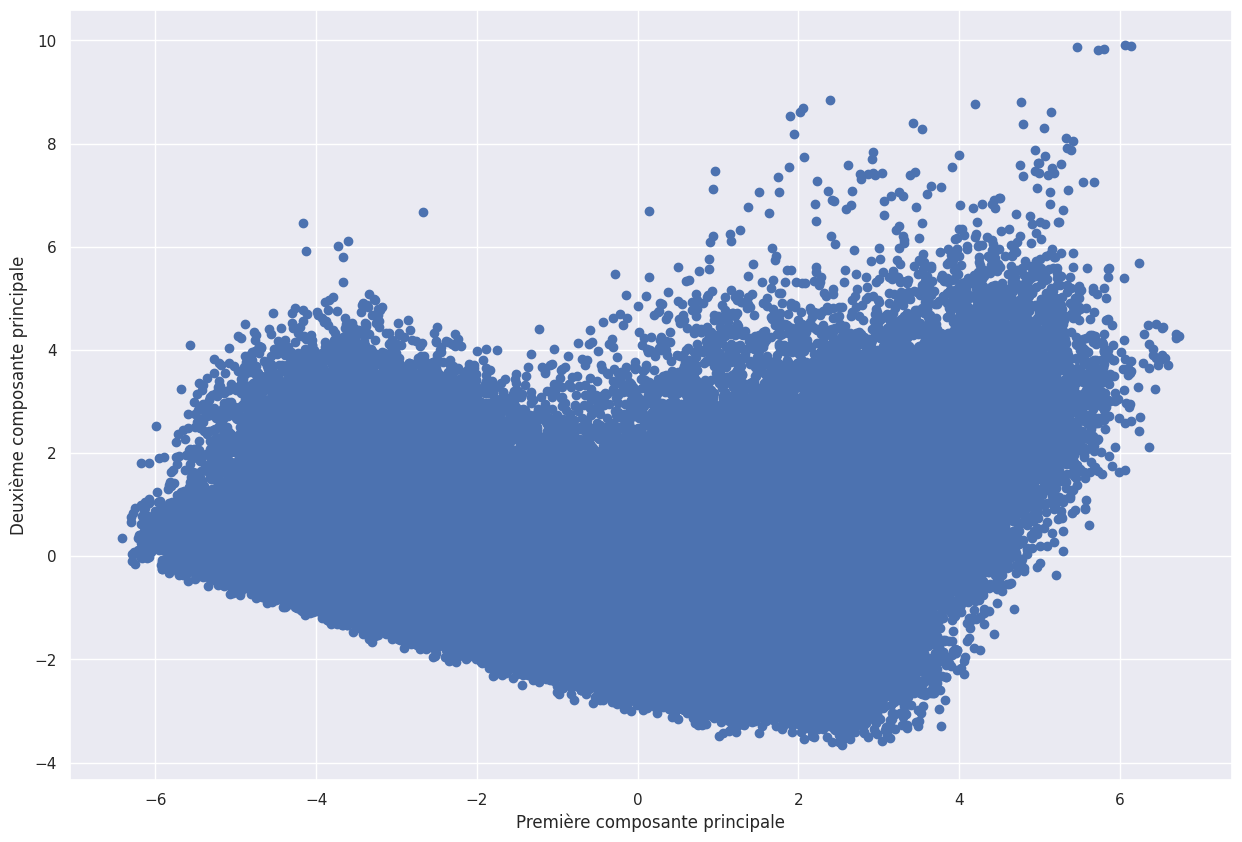

In [44]:
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.show()

In [45]:
DZH

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,mortgage_loan,credit_builder_loan,student_loan,debt_consolidation_loan,payday_loan,No_Data,Credit_Score,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour
0,1.0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
1,2.0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0
2,3.0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0
3,4.0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0
4,5.0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4.0,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
99996,5.0,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
99997,6.0,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,27.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
99998,7.0,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,3.0


In [46]:
DZH.T

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
Month,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,1.000000,2.000000,...,7.000000,8.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000
Age,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,28.000000,28.000000,...,28.000000,29.000000,24.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
Annual_Income,19114.120000,19114.120000,19114.120000,19114.120000,19114.120000,19114.120000,19114.120000,19114.120000,34847.840000,34847.840000,...,20002.880000,20002.880000,39628.990000,39628.990000,39628.990000,39628.990000,39628.990000,39628.990000,39628.990000,39628.990000
Monthly_Inhand_Salary,1824.843333,1824.843333,1824.843333,1824.843333,1824.843333,1824.843333,1824.843333,1824.843333,3037.986667,3037.986667,...,1929.906667,1929.906667,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833
Num_Bank_Accounts,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,...,10.000000,10.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
Num_Credit_Card,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,8.000000,8.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
Interest_Rate,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000,6.000000,...,29.000000,29.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
Num_of_Loan,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,1.000000,...,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
Delay_from_due_date,3.000000,3.000000,3.000000,5.000000,6.000000,8.000000,3.000000,3.000000,3.000000,7.000000,...,33.000000,33.000000,23.000000,23.000000,20.000000,23.000000,18.000000,27.000000,20.000000,18.000000
Num_of_Delayed_Payment,7.000000,4.000000,7.000000,4.000000,4.000000,4.000000,8.000000,6.000000,4.000000,1.000000,...,25.000000,25.000000,6.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000,6.000000


In [47]:
variables_to_normalize = ['Age','Payment_Behaviour', 'Monthly_Inhand_Salary', 'Annual_Income','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Delay_from_due_date','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio','Credit_History_Age','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']
scaler = MinMaxScaler()
DZH[variables_to_normalize] = scaler.fit_transform(DZH[variables_to_normalize])


In [48]:
DZH.T

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
Month,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,1.000000,2.000000,...,7.000000,8.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000
Age,0.214286,0.214286,0.214286,0.214286,0.214286,0.214286,0.214286,0.214286,0.333333,0.333333,...,0.333333,0.357143,0.238095,0.261905,0.261905,0.261905,0.261905,0.261905,0.261905,0.261905
Annual_Income,0.069997,0.069997,0.069997,0.069997,0.069997,0.069997,0.069997,0.069997,0.160953,0.160953,...,0.075135,0.075135,0.188593,0.188593,0.188593,0.188593,0.188593,0.188593,0.188593,0.188593
Monthly_Inhand_Salary,0.102087,0.102087,0.102087,0.102087,0.102087,0.102087,0.102087,0.102087,0.183501,0.183501,...,0.109138,0.109138,0.205072,0.205072,0.205072,0.205072,0.205072,0.205072,0.205072,0.205072
Num_Bank_Accounts,0.272727,0.272727,0.272727,0.272727,0.272727,0.272727,0.272727,0.272727,0.181818,0.181818,...,0.909091,0.909091,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636
Num_Credit_Card,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,...,0.727273,0.727273,0.545455,0.545455,0.545455,0.545455,0.545455,0.545455,0.545455,0.545455
Interest_Rate,0.060606,0.060606,0.060606,0.060606,0.060606,0.060606,0.060606,0.060606,0.151515,0.151515,...,0.848485,0.848485,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818
Num_of_Loan,0.444444,0.444444,0.444444,0.444444,0.444444,0.444444,0.444444,0.444444,0.111111,0.111111,...,0.555556,0.555556,0.222222,0.222222,0.222222,0.222222,0.222222,0.222222,0.222222,0.222222
Delay_from_due_date,0.048387,0.048387,0.048387,0.080645,0.096774,0.129032,0.048387,0.048387,0.048387,0.112903,...,0.532258,0.532258,0.370968,0.370968,0.322581,0.370968,0.290323,0.435484,0.322581,0.290323
Num_of_Delayed_Payment,0.280000,0.160000,0.280000,0.160000,0.160000,0.160000,0.320000,0.240000,0.160000,0.040000,...,1.000000,1.000000,0.240000,0.240000,0.240000,0.280000,0.280000,0.240000,0.240000,0.240000


In [49]:
DATAZH.T

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
ID,5634,5635,5636,5637,5638,5639,5640,5641,5646,5647,...,155616,155617,155622,155623,155624,155625,155626,155627,155628,155629
Customer_ID,3392,3392,3392,3392,3392,3392,3392,3392,8625,8625,...,34304,34304,37932,37932,37932,37932,37932,37932,37932,37932
Month,1,2,3,4,5,6,7,8,1,2,...,7,8,1,2,3,4,5,6,7,8
Name,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Rick Rothackerj,Rick Rothackerj,...,Sarah McBridec,Sarah McBridec,Nicks,Nicks,Nicks,Nicks,Nicks,Nicks,Nicks,Nicks
Age,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,28.0,28.0,...,28.0,29.0,24.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0
SSN,821000265.0,821000265.0,821000265.0,821000265.0,821000265.0,821000265.0,821000265.0,821000265.0,4075839.0,4075839.0,...,31350942.0,31350942.0,78735990.0,78735990.0,78735990.0,78735990.0,78735990.0,78735990.0,78735990.0,78735990.0
Occupation,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist,Teacher,Teacher,...,Architect,Architect,Mechanic,Mechanic,Mechanic,Mechanic,Mechanic,Mechanic,Mechanic,Mechanic
Annual_Income,19114.12,19114.12,19114.12,19114.12,19114.12,19114.12,19114.12,19114.12,34847.84,34847.84,...,20002.88,20002.88,39628.99,39628.99,39628.99,39628.99,39628.99,39628.99,39628.99,39628.99
Monthly_Inhand_Salary,1824.843333,1824.843333,1824.843333,1824.843333,1824.843333,1824.843333,1824.843333,1824.843333,3037.986667,3037.986667,...,1929.906667,1929.906667,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833
Num_Bank_Accounts,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,...,10.0,10.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


In [50]:
pca.fit(DZH)


PCA(n_components=2)

In [51]:
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)


In [52]:
n_components = np.argmax(explained_variance_ratio_cumulative >= 0.90) + 1


In [53]:
data_reduced = pca.transform(DZH)[:, :n_components]


In [54]:
data_reduced


array([[-3.48179259],
       [-2.48180997],
       [-1.48189441],
       ...,
       [ 1.50260339],
       [ 2.48853016],
       [ 3.50231515]])

In [55]:
DZH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 46 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  float64
 1   Age                       100000 non-null  float64
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  float64
 5   Num_Credit_Card           100000 non-null  float64
 6   Interest_Rate             100000 non-null  float64
 7   Num_of_Loan               100000 non-null  float64
 8   Delay_from_due_date       100000 non-null  float64
 9   Num_of_Delayed_Payment    100000 non-null  float64
 10  Changed_Credit_Limit      100000 non-null  float64
 11  Num_Credit_Inquiries      100000 non-null  float64
 12  Outstanding_Debt          100000 non-null  float64
 13  Credit_Utilization_Ratio  100000 non-null  fl

In [56]:
X_train, X_test, y_train, y_test = train_test_split(data_reduced,DZH['Credit_Score'], test_size=0.2, random_state=42)


In [57]:
#svm
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


In [58]:
accuracy

0.52995

In [59]:
accuracy_score(y_test, y_pred)

0.52995

In [60]:
f1 = f1_score(y_test, y_pred, average='weighted')


In [61]:
f1

0.36713226249223835

In [62]:
#knn
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

In [63]:
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [64]:
#verif le choix du k=5
scores = cross_val_score(knn, DZH, DZH['Credit_Score'], cv=5)  # X et y représentent vos données et étiquettes respectivement


In [65]:
mean_score = scores.mean()
mean_score

0.9950300000000001

In [66]:
y_pred = knn.predict(X_test)


In [67]:
accuracyy = accuracy_score(y_test, y_pred)


In [68]:
accuracyy

0.995

In [69]:
f1s = f1_score(y_test, y_pred, average='weighted')



In [70]:
f1s

0.9950036447182745

In [71]:
#dics tree
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(data_reduced,DZH['Credit_Score'], test_size=0.2, random_state=42)


# Instancier le modèle d'arbre de décision
tree = DecisionTreeClassifier()

# Entraîner le modèle sur les données d'entraînement
tree.fit(X_train, y_train)

# Prédire les étiquettes pour les données de test
y_pred = tree.predict(X_test)

# Calcule DE l'exactitude du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Exactitude : {:.2f}".format(accuracy))


Exactitude : 0.99


In [72]:
accuracy

0.9937

In [73]:
f1t = f1_score(y_test, y_pred, average='weighted')



In [74]:
f1t

0.9937011665335326

In [75]:
# rg log
#Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(data_reduced,DZH['Credit_Score'], test_size=0.2, random_state=42)
# Instancier le modèle de régression logistique
logreg = LogisticRegression()

# Entraîner le modèle sur les données d'entraînement
logreg.fit(X_train, y_train)

# Prédire les étiquettes pour les données de test
y_pred = logreg.predict(X_test)

# Calculer l'exactitude du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Exactitude : {:.2f}".format(accuracy))

Exactitude : 0.53


In [76]:
accuracy

0.52995

In [77]:
f1rgl = f1_score(y_test, y_pred, average='weighted')

f1rgl

0.36713226249223835

In [78]:
dimension = np.shape(DZH)

In [79]:
classes = np.unique(DZH['Credit_Score'])
num_classes = len(classes)
num_classes
#bad standard good

3

In [80]:
#au lieu du cnn jE vais  utiliser reseau de neurone dense


# Diviser les données en ensembles d'entraînement et de test

# Entraîner le modèle

# Prédire les étiquettes pour les données de test

# Convertir les prédictions en étiquettes de classe

# Calculer l'exactitude du modèle


In [81]:
dimension



(100000, 46)